<a href="https://colab.research.google.com/github/diegoluchetti/analises_indices/blob/main/TensorFlow_2_0_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependências

In [ ]:
!pip install tensorflow==2.0.0-alpha0

    100% |████████████████████████████████| 79.9MB 278kB/s 
    100% |████████████████████████████████| 61kB 21.4MB/s 
    100% |████████████████████████████████| 3.0MB 10.7MB/s 
    100% |████████████████████████████████| 419kB 21.6MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

print(tf.__version__)

2.0.0-alpha0


In [ ]:
#@title
def make_cubic(n_samples, x_min, x_max, a=1, b=0, c=0, d=0, noise=0.0, random_state=None):
    np.random.seed(random_state)
    x = np.linspace(x_min, x_max, n_samples)
    y = a*x**3 + b*x**2 + c*x + d + (2*noise*np.random.random(n_samples) - noise)
    return x.reshape(-1,1), y.reshape(-1,1)

def make_exp(n_samples, x_min, x_max, noise=0.0, random_state=None):
    np.random.seed(random_state)
    x = np.linspace(x_min, x_max, n_samples)
    y = np.exp(x) + 2*noise*np.random.random(n_samples) - noise
    return x.reshape(-1,1), y.reshape(-1,1)
    
def make_log10(n_samples, x_min, x_max, noise=0.0, random_state=None):
    np.random.seed(random_state)
    x = np.logspace(np.log10(x_min), np.log10(x_max), n_samples)
    y = np.log10(x) + 2*noise*np.random.random(n_samples) - noise
    return x.reshape(-1,1), y.reshape(-1,1)

def make_spiral(n_samples, n_class=2, radius=1, laps=1.0, noise=0.0, random_state=None):
    np.random.seed(random_state)
    x = np.zeros((n_samples * n_class, 2))
    y = np.zeros((n_samples * n_class))
    
    pi_2 = 2 * np.math.pi
    points = np.linspace(0, 1, n_samples)
    r = points * radius
    t = points * pi_2 * laps
    for label, delta_t in zip(range(n_class), np.arange(0, pi_2, pi_2/n_class)):
        random_noise = (2 * np.random.rand(n_samples) - 1) * noise
        index = np.arange(label*n_samples, (label+1)*n_samples)
        x[index] = np.c_[r * np.sin(t + delta_t) + random_noise,
                         r * np.cos(t + delta_t) + random_noise]
        y[index] = label
    return x, y.reshape(-1, 1)

def make_square(n_samples, x_min, x_max, a=1, b=0, c=0, noise=0.0, random_state=None):
    np.random.seed(random_state)
    x = np.linspace(x_min, x_max, n_samples)
    y = a*x**2 + b*x + c + (2*noise*np.random.random(n_samples) - noise)
    return x.reshape(-1,1), y.reshape(-1,1)

def plot_hist_and_line(history, x, y, model):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'])
    plt.xlabel('epochs')
    plt.ylabel('loss')

    plt.subplot(1, 2, 2)
    x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_test)
    plt.scatter(x, y)
    plt.plot(x_test, y_pred, color='green')
    plt.xlabel('x')
    plt.ylabel('y')


# Regressão Linear

(100, 1) (100, 1)


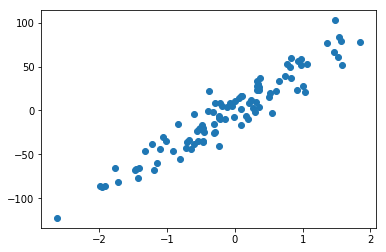

In [ ]:
x, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
y = y.reshape(-1, 1)
print(x.shape, y.shape)

plt.scatter(x, y)

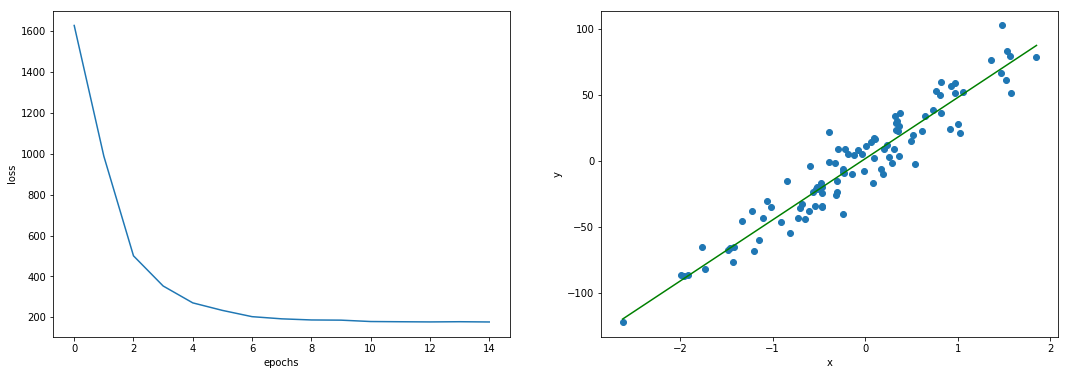

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(x.shape[1], )))

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.05), loss='mse')

hist = model.fit(x, y, epochs=15, verbose=0)

plot_hist_and_line(hist.history, x, y, model)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x, y)

print(reg.coef_, reg.intercept_)

[[45.78520483]] [1.74767298]


In [ ]:
print(model.get_weights())

[array([[46.445107]], dtype=float32), array([1.5304443], dtype=float32)]


# Regressão Quadrática

(100, 1) (100, 1)


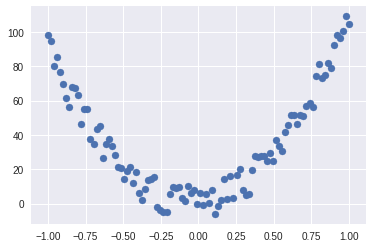

In [ ]:
x, y = make_square(n_samples=100, x_min=-10, x_max=10, a=1, b=1, c=1, noise=10)
print(x.shape, y.shape)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float32))

plt.scatter(x, y)

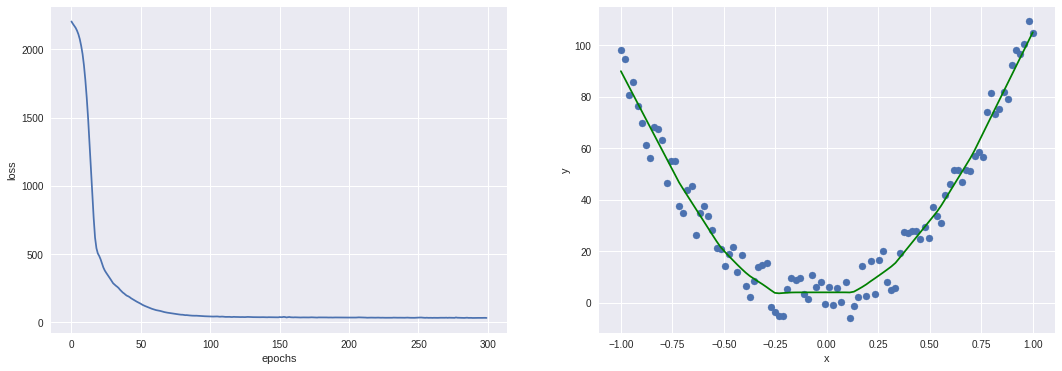

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(x.shape[1], )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

hist = model.fit(x, y, epochs=300, verbose=0)

plot_hist_and_line(hist.history, x, y, model)

# Regressão Cúbica

In [ ]:
x, y = make_cubic(n_samples=100, x_min=-4, x_max=4, a=1, b=0, c=-10, d=0, noise=3)

print(x.shape, y.shape)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

(100, 1) (100, 1)
[-1.] [1.]


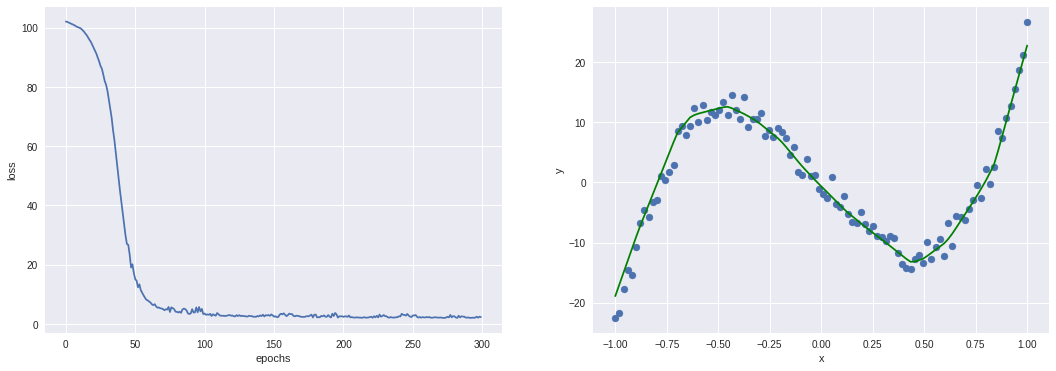

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(x.shape[1], )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

hist = model.fit(x, y, epochs=300, verbose=0)

plot_hist_and_line(hist.history, x, y, model)

# Regressão Logarítmica

In [ ]:
x, y = make_log10(n_samples=100, x_min=1, x_max=100, noise=0.3)

print(x.shape, y.shape)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

(100, 1) (100, 1)
[-1.] [1.]


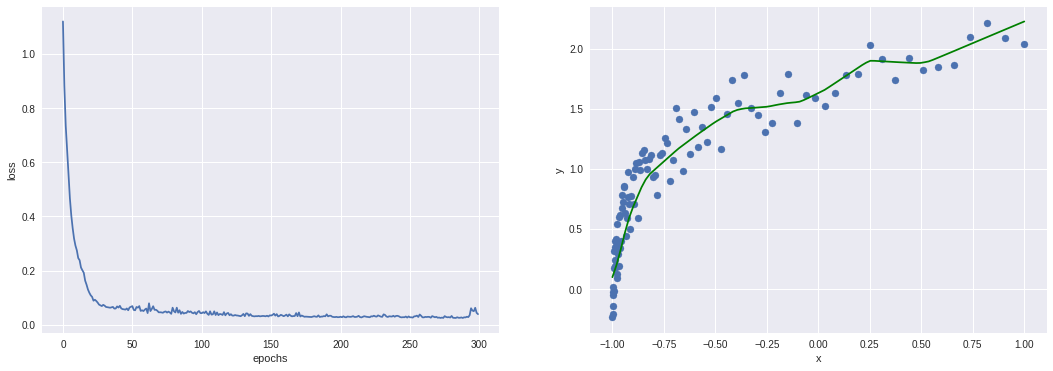

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(x.shape[1], )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

hist = model.fit(x, y, epochs=300, verbose=0)

plot_hist_and_line(hist.history, x, y, model)

# Regressão Exponencial

In [ ]:
x, y = make_exp(n_samples=100, x_min=0, x_max=5, noise=10)

print(x.shape, y.shape)

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

(100, 1) (100, 1)
[-1.] [1.]


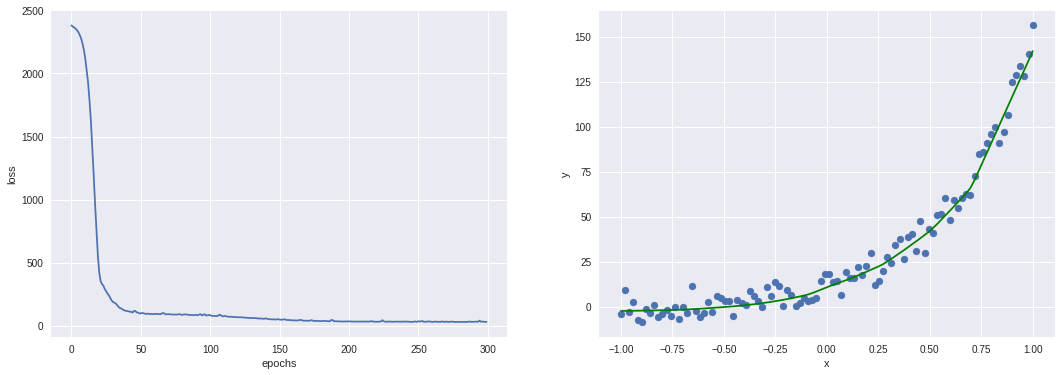

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(x.shape[1], )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

hist = model.fit(x, y, epochs=300, verbose=0)

plot_hist_and_line(hist.history, x, y, model)